# AAI-500 Final Team Project - Group 7
#### Members:
#### Suman Senapati
#### Ananya Chandraker
#### Krishnasamy Sethuram

## Problem statement: 

We have chosen to work on AIDS VIRUS Infection prediction dataset which encapsulates a broad spectrum of clinical and demographical variables related to AIDS patients.

#### Title of the Project: Statistical Analysis and Predictive Modeling for AIDS Virus Infection

####  Short Description of the Project: 
   This project performs a Statistical Analysis and Predictive Modeling for AIDS Virus Infection

####  Objectives of the Project: 
1) To develop a predictive model for AIDS virus Infection using the clinical data.
2) We aim to identify the key risk factors associated with the HIV infection and asses their impact
   through probability and statistical analysis. 
3) We aim to perform Descriptive statistics like calculation of mean, median, mode, variance and 
   standard deviation for numerical variables to gain insights into the central tendency and dispersion 
   of numerical variables such as age and on clinical data to understand characteristics of population. 
4) We aim to perform Inferential statistics like perform Hypothesis testing and chi-squared tests
   to compare means between different groups (for example: infected vs non-infected patients)
   and derive conclusions about the broader population based on the sample data
5) We aim to perform Predictive modeling to establish the relationship between predictors 
   like (clinical results) and the viral infection using logistic regression analysis, correlation analysis.
   This would predict the likelihood of HIV infection based on various predictors
   
####  Details of Dataset:  

   This is a AIDS classification dataset which encapsulates a broad spectrum of clinical and 
   Demographical variables related to AIDS patients.
   
   Data Source: - OpenML- AIDS_Virus_Infection_Prediction (https://www.openml.org/search?type=data&status=active&id=46076&sort=runs)
   
   Number of Variables: 23
   
   Number of Instances: 50000
   
   Size of dataset: 5.35 MB

# Solution:

## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import plotly.express as px
import warnings
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [7]:
warnings.filterwarnings("ignore")

## Importing dataset from OpenML

In [9]:
#AIDS classification dataset
data = fetch_openml(data_id=46076, as_frame=True)
df = data.frame # Our original dataset stored in a dataframe 'df'

## Metadata associated with Dataset

Adding the attribute description here for reference:

time: Time since the baseline measurement, in days.

trt: Treatment code (0, 1, 2), where each number signifies a different treatment regimen.

age: Age of the patient in years.

wtkg: Weight of the patient in kilograms.

hemo: Presence of Hemophilia (0 = No, 1 = Yes).

homo: Homosexual behavior (0 = No, 1 = Yes).

drugs: Drug use (0 = No, 1 = Yes).

karnof: Karnofsky score indicating patient's functional impairment (scores range from 0 to 100).

oprior: Number of opportunistic infections prior to study.

z30: Presence of Z30 gene (0 = No, 1 = Yes).

preanti: Months before receiving antiretroviral therapy.

race: Race (0 = Non-white, 1 = White).

gender: Gender (0 = Female, 1 = Male).

str2: Stratification variable 2.

strat: Overall stratification.

symptom: Presence of specific AIDS-related symptoms (0 = No, 1 = Yes).

treat: Treatment response (0 = No, 1 = Yes).

offtrt: Off treatment (0 = No, 1 = Yes).

cd40: CD4 count at the baseline.

cd420: CD4 count at 20 weeks.

cd80: CD4 count at 8 weeks.

cd820: CD4 count at 20 weeks post the 8-week measurement.

infected: HIV infection status (0 = Negative, 1 = Positive).

## Exploratory Data Analysis

#### Initial analysis

In [14]:
df.head(5)

time  trt  age       wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0  1073    1   37   79.46339     0     1      0     100       0    1  ...   
1   324    0   33   73.02314     0     1      0      90       0    1  ...   
2   495    1   43   69.47793     0     1      0     100       0    1  ...   
3  1201    3   42   89.15934     0     1      0     100       1    1  ...   
4   934    0   37  137.46581     0     1      0     100       0    0  ...   

   str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0     1      2        0      1       0   322    469   882    754         1  
1     1      3        1      1       1   168    575  1035   1525         1  
2     1      1        0      0       0   377    333  1147   1088         1  
3     1      3        0      0       0   238    324   775   1019         1  
4     0      3        0      0       1   500    443  1601    849         0  

[5 rows x 23 columns]

In [15]:
df.shape

(50000, 23)

In [16]:
df.describe().T

count         mean         std        min         25%  \
time      50000.0   877.369780  307.288688   66.00000  542.000000   
trt       50000.0     1.384800    1.233272    0.00000    0.000000   
age       50000.0    34.164020    7.091152   12.00000   29.000000   
wtkg      50000.0    75.861991   12.028730   42.36162   68.253682   
hemo      50000.0     0.033480    0.179888    0.00000    0.000000   
homo      50000.0     0.653540    0.475847    0.00000    0.000000   
drugs     50000.0     0.132220    0.338733    0.00000    0.000000   
karnof    50000.0    96.831560    5.091788   76.00000   90.000000   
oprior    50000.0     0.042300    0.201275    0.00000    0.000000   
z30       50000.0     0.640880    0.479747    0.00000    0.000000   
preanti   50000.0   318.159560  402.932765    0.00000    0.000000   
race      50000.0     0.293300    0.455279    0.00000    0.000000   
gender    50000.0     0.856700    0.350382    0.00000    1.000000   
str2      50000.0     0.575200    0.494318    0.00000    0.000000   
strat     50000.0     1.936420    0.895318    1.00000    1.000000   
symptom   50000.0     0.083460    0.276579    0.00000    0.000000   
treat     50000.0     0.734160    0.441784    0.00000    0.000000   
offtrt    50000.0     0.342220    0.474458    0.00000    0.000000   
cd40      50000.0   319.079540  102.525976    0.00000  236.000000   
cd420     50000.0   438.090100  144.806831   81.00000  327.000000   
cd80      50000.0  1045.936440  488.617434   96.00000  713.000000   
cd820     50000.0   905.938440  339.707976  173.00000  649.000000   
infected  50000.0     0.310120    0.462547    0.00000    0.000000   

                  50%          75%         max  
time      1045.000000  1136.000000  1231.00000  
trt          1.000000     3.000000     3.00000  
age         34.000000    39.000000    68.00000  
wtkg        74.054115    81.142185   149.83087  
hemo         0.000000     0.000000     1.00000  
homo         1.000000     1.000000     1.00000  
drugs        0.000000     0.000000     1.00000  
karnof     100.000000   100.000000   100.00000  
oprior       0.000000     0.000000     1.00000  
z30          1.000000     1.000000     1.00000  
preanti    123.000000   503.000000  2828.00000  
race         0.000000     1.000000     1.00000  
gender       1.000000     1.000000     1.00000  
str2         1.000000     1.000000     1.00000  
strat        2.000000     3.000000     3.00000  
symptom      0.000000     0.000000     1.00000  
treat        1.000000     1.000000     1.00000  
offtrt       0.000000     1.000000     1.00000  
cd40       299.000000   396.000000   930.00000  
cd420      415.000000   531.000000  1119.00000  
cd80       885.000000  1245.000000  4656.00000  
cd820      858.000000  1084.000000  3538.00000  
infected     0.000000     1.000000     1.00000

In [17]:
df.isna().sum().sum()

0

In [18]:
df.dtypes

time          int64
trt           int64
age           int64
wtkg        float64
hemo          int64
homo          int64
drugs         int64
karnof        int64
oprior        int64
z30           int64
preanti       int64
race          int64
gender        int64
str2          int64
strat         int64
symptom       int64
treat         int64
offtrt        int64
cd40          int64
cd420         int64
cd80          int64
cd820         int64
infected      int64
dtype: object

In [19]:
df['infected'].unique()

array([1, 0], dtype=int64)

Here's what we know about the dataset:
1. No missing/NaN values
2. The dataset has 50k rows and 23 columns
3. The dataset has no categorical variables. But, some of these numerical variables may be discrete. Needs further analysis to figure that out.


Our target variable is infected which has two unique values, as describes in the attrib description

### Outlier detection and removal

#### Using IQR

In [23]:
outliers = pd.DataFrame()

def outlier_det(df):
    for x in df.columns:
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3 - Q1
        low_bound = Q1 - (1.5*IQR)
        up_bound = Q3 + (1.5*IQR)
        out = (df[x] < low_bound) | (df[x] > up_bound)
        outliers[x] = out

In [24]:
outlier_det(df)
df = df[~outliers.any(axis=1)]
print(f"Cleaned dataset shape: {df.shape}")

Cleaned dataset shape: (26560, 23)


### Univariate Analysis

Distribution of the target variable

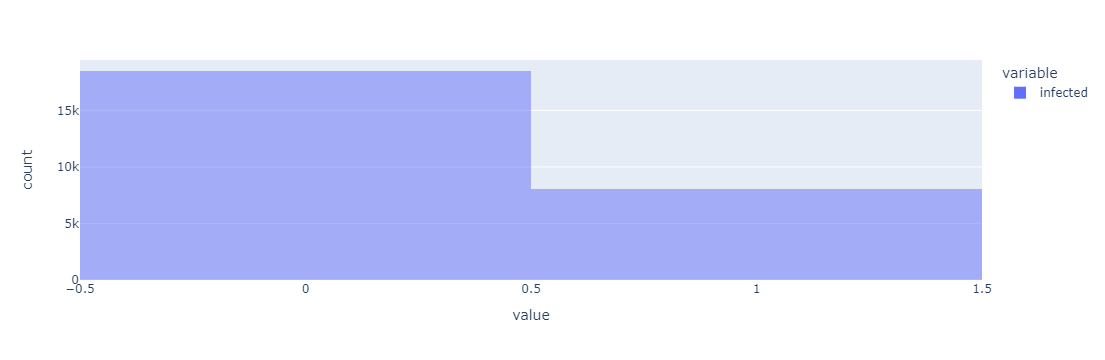

In [28]:
fig = px.histogram(df['infected'],barmode='overlay',nbins=2)
fig.show()

In [29]:
df.nunique()

time         1057
trt             4
age            41
wtkg        26445
hemo            1
homo            2
drugs           1
karnof         12
oprior          1
z30             2
preanti      1244
race            2
gender          1
str2            2
strat           3
symptom         1
treat           2
offtrt          2
cd40          532
cd420         705
cd80         1702
cd820        1436
infected        2
dtype: int64

In [30]:
for x in df.columns:
    if df[x].dtype == 'int64':
        print(f'{x} : discrete')
    elif df[x].dtype == 'float64':
        if all(x.is_integer() for x in df[x].dropna()):
            print(f'{x} : discrete')
        else:
            print(f'{x} : continuous')

time : discrete
trt : discrete
age : discrete
wtkg : continuous
hemo : discrete
homo : discrete
drugs : discrete
karnof : discrete
oprior : discrete
z30 : discrete
preanti : discrete
race : discrete
gender : discrete
str2 : discrete
strat : discrete
symptom : discrete
treat : discrete
offtrt : discrete
cd40 : discrete
cd420 : discrete
cd80 : discrete
cd820 : discrete
infected : discrete


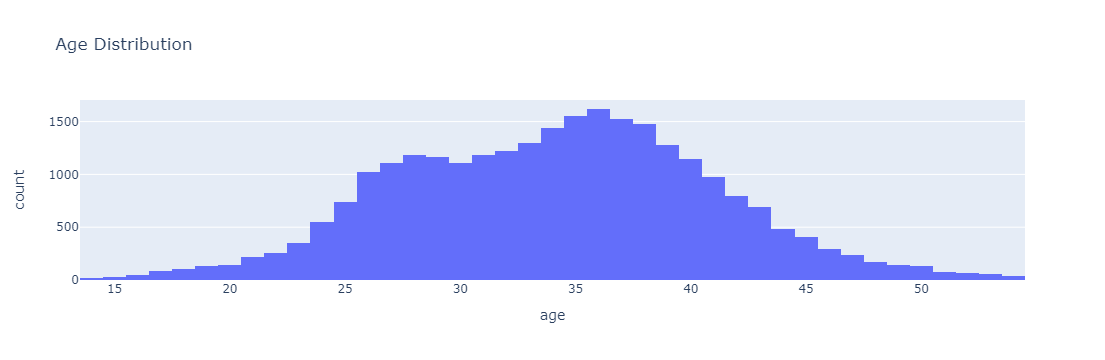

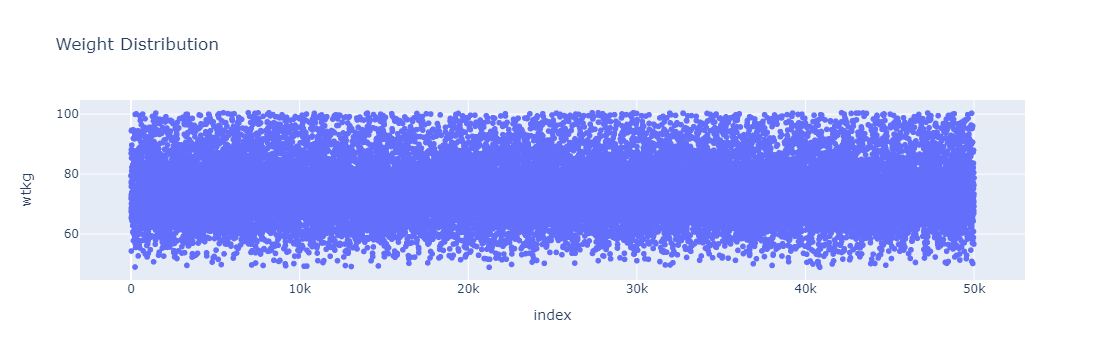

In [31]:
fig = px.histogram(df, x='age', title='Age Distribution')
fig.show()

fig = px.scatter(df, y='wtkg', title='Weight Distribution')
fig.show()

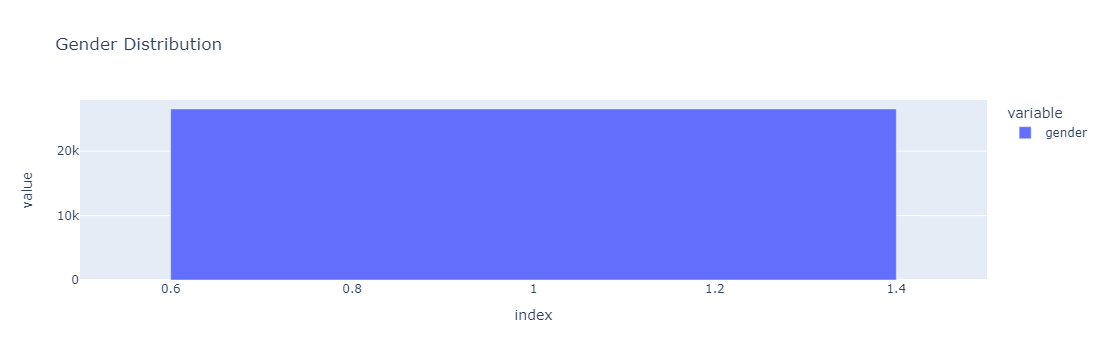

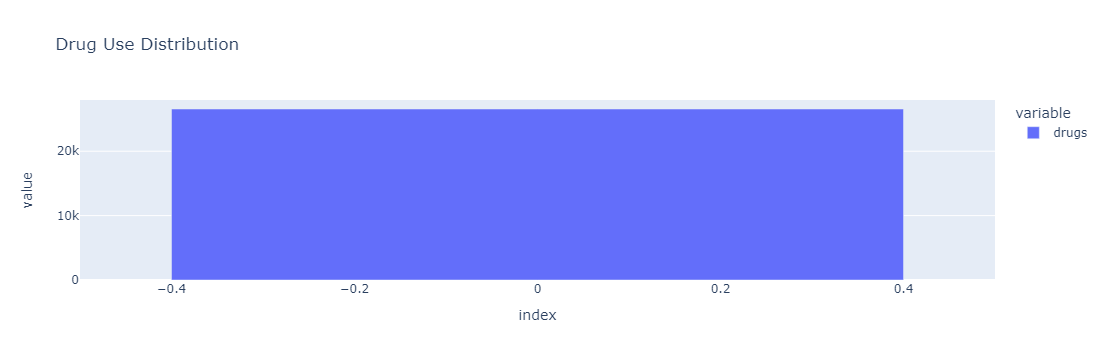

In [32]:
fig = px.bar(df['gender'].value_counts(), title='Gender Distribution')
fig.show()

fig = px.bar(df['drugs'].value_counts(), title='Drug Use Distribution')
fig.show()

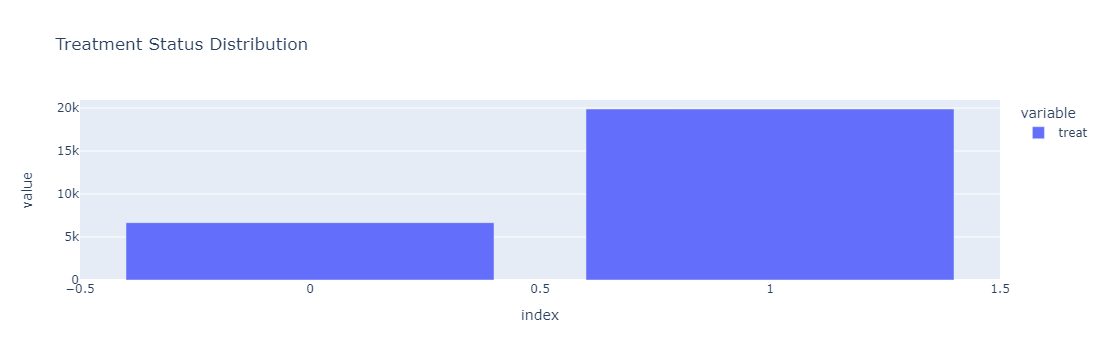

In [33]:
fig = px.bar(df['treat'].value_counts(), title='Treatment Status Distribution')
fig.show()

### Bivariate Analysis

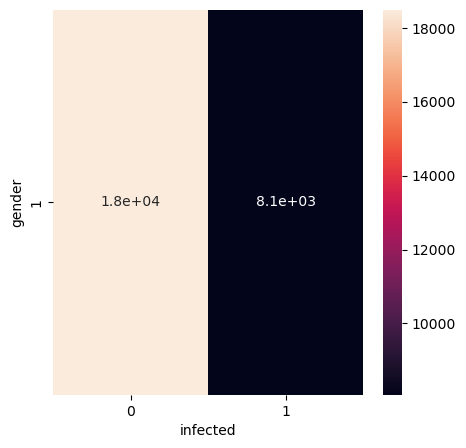

In [35]:
cross = pd.crosstab(df['gender'], df['infected'])
fig,ax = plt.subplots(figsize=(5,5))
sn.heatmap(cross, annot=True, ax=ax)
plt.show()

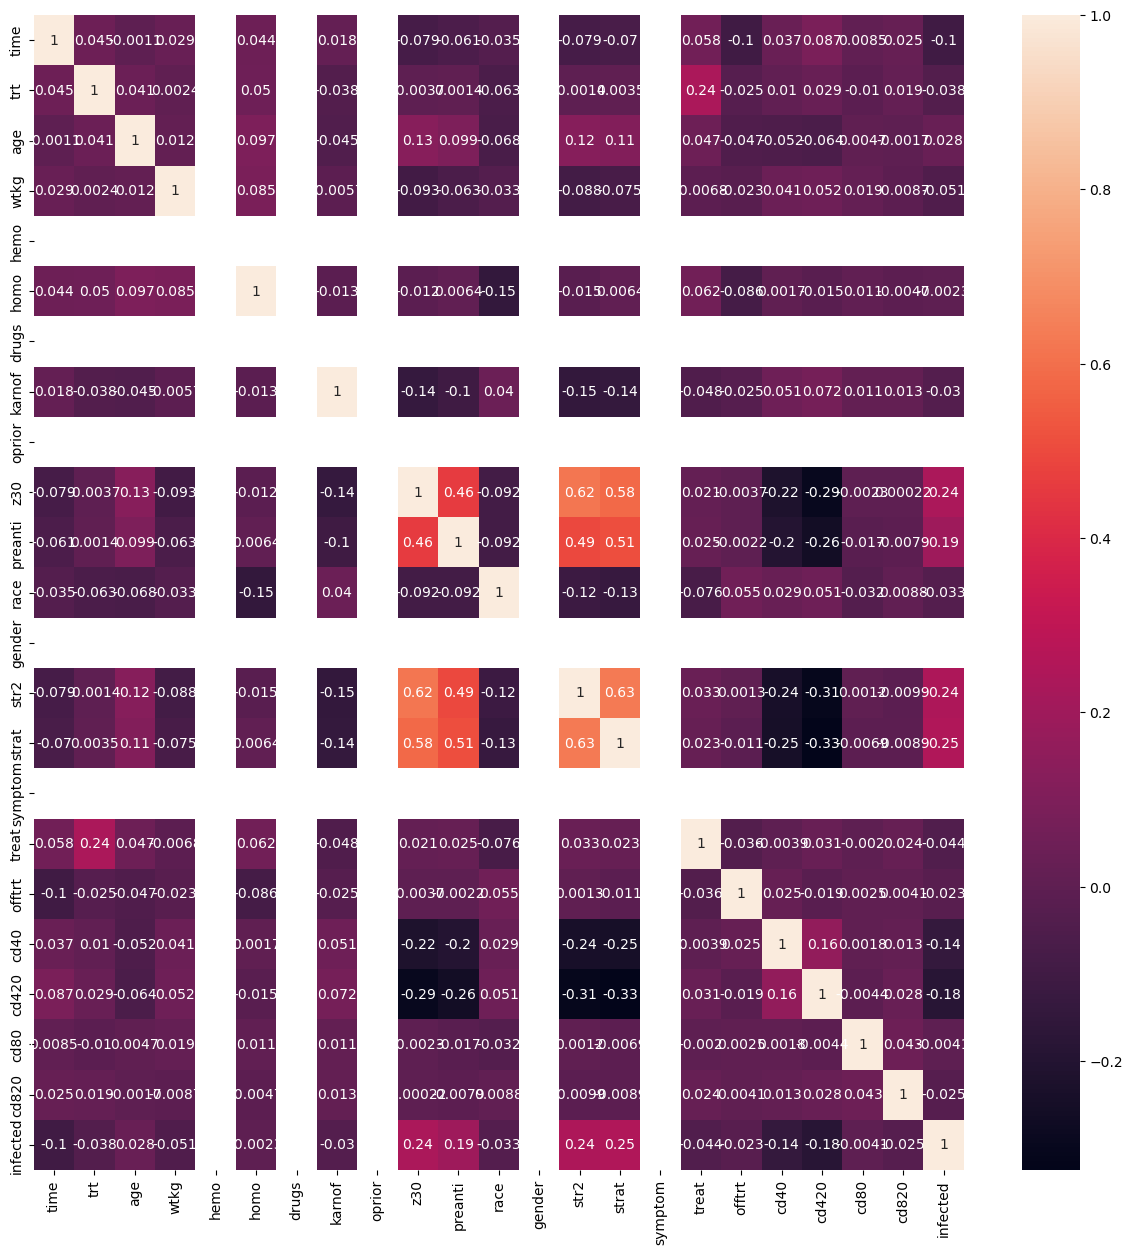

In [36]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(cor, annot=True, ax=ax)
plt.show()

## Variance Inflation Factor Analysis

In [38]:
X = df.drop('infected',axis=1)
Y = df['infected']

vif_data = pd.DataFrame()
vif_data["Feature"] =X.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

In [39]:
print(vif_data)

    Feature         VIF
0      time    1.028955
1       trt    1.066430
2       age    1.037305
3      wtkg    1.021238
4      hemo         NaN
5      homo    1.048281
6     drugs         NaN
7    karnof    1.033384
8    oprior         NaN
9       z30    1.864761
10  preanti    1.491509
11     race    1.054679
12   gender  541.068918
13     str2    2.079469
14    strat    2.010559
15  symptom         NaN
16    treat    1.073712
17   offtrt    1.023093
18     cd40    1.090590
19    cd420    1.169253
20     cd80    1.004144
21    cd820    1.004508


In [40]:
pca = PCA()

X_pca = pca.fit_transform(X)

In [41]:
print(pca.explained_variance_ratio_)

[2.81280424e-01 2.70560574e-01 2.00230686e-01 1.88202479e-01
 3.88867344e-02 2.04884384e-02 1.87126420e-04 1.00350419e-04
 5.62043208e-05 3.33102192e-06 1.39388485e-06 5.28776388e-07
 4.40472134e-07 3.82723936e-07 3.66066143e-07 3.42982421e-07
 1.97289167e-07 2.75086590e-36 3.77966830e-37 2.12648242e-38
 1.43810778e-40 1.26075535e-40]


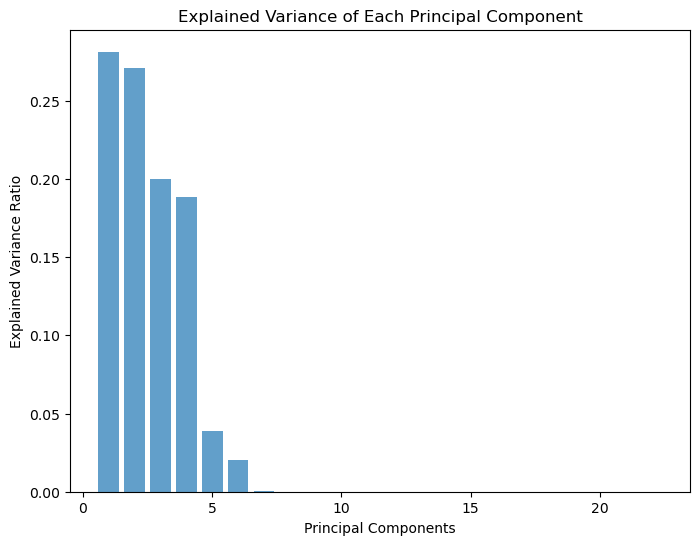

In [42]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, 23), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Principal Component')
plt.show()

In [43]:
pca = PCA(n_components=6)

X_pca = pca.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

## Model dev

Since it's a binary classification case, we shall start with the simplest algorithm

#### Logistic Regression

In [48]:
lr_model = LogisticRegressionCV(class_weight = {0: 1, 1: 2})
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [49]:
f1score = np.round(f1_score(y_pred, y_test),4)
precision = np.round(precision_score(y_pred, y_test),4)
recall = np.round(recall_score(y_pred, y_test),4)
accuracy = np.round(accuracy_score(y_pred, y_test),4)

print(f'Accuracy score: {accuracy} , F1-Score: {f1score} , Precision: {precision} , Recall: {recall}')

Accuracy score: 0.6578 , F1-Score: 0.4885 , Precision: 0.5315 , Recall: 0.4518


#### Random Forest

In [52]:
rf_model = RandomForestClassifier(n_estimators=400)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [53]:
f1score = np.round(f1_score(y_pred, y_test),4)
precision = np.round(precision_score(y_pred, y_test),4)
recall = np.round(recall_score(y_pred, y_test),4)
accuracy = np.round(accuracy_score(y_pred, y_test),4)

print(f'Accuracy score: {accuracy} , F1-Score: {f1score} , Precision: {precision} , Recall: {recall}')

Accuracy score: 0.6952 , F1-Score: 0.2858 , Precision: 0.1984 , Recall: 0.511


#### XGBoost

In [56]:
xgb_model = xgb.XGBClassifier(eta=0.6, max_depth=12, max_delta_step=10)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [57]:
f1score = np.round(f1_score(y_pred, y_test),4)
precision = np.round(precision_score(y_pred, y_test),4)
recall = np.round(recall_score(y_pred, y_test),4)
accuracy = np.round(accuracy_score(y_pred, y_test),4)

print(f'Accuracy score: {accuracy} , F1-Score: {f1score} , Precision: {precision} , Recall: {recall}')

Accuracy score: 0.657 , F1-Score: 0.3403 , Precision: 0.2878 , Recall: 0.4163
